# Data : AirBnB

*   Data from: http://insideairbnb.com/

## 데이터 불러오기

In [4]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#데이터 불러오기
bnb = pd.read_csv('AB_NYC_2019.csv')

In [6]:
#불러온 데이터 확인
bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


<컬럼 설명>   
* id: 일련번호
* name: AirBnB 이름
* host_id: 호스트 ID  
* host_name: 호스트 성명 
* neighbourhood_group: 지역   
* latitude: 위도  
* longitude: 경도  
* room_type: 방 타입  
* price: 가격  
* minimum_nights: 최소 숙박일수  
* number_of_reviews: 리뷰 개수
* last_review: 최근 리뷰 일자
* reviews_per_month: 월 평균 리뷰 수
* calculated_host_listings_count:  호스트에게 대여 가능한 에어비앤비의 총 개수
* availability_365: 1년 중 가능한 대여일수

* 범주형 변수: 
               host_name, Neighbor_group, neighbourhood, room_type
* 연속형 변수: 
               id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review,
               reviews_per_month registered_host_listings_count, availability_365

In [7]:
#데이터 기본 정보 확인하기
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#데이터 내용 간단히 정리해서 출력
print("총 데이터 개수: ", bnb.shape[0]*bnb.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(bnb.isnull().sum().sum(), (bnb.isnull().sum().sum()*100)/(bnb.shape[0]*bnb.shape[1])))
print("호스트 ID: {} 개, 호스트 {} 명".format(bnb['host_id'].nunique(), bnb['host_name'].nunique()))
print("2019년 뉴욕의 평균 Airbnb 금액: {:.2f} $".format(bnb['price'].mean()))

총 데이터 개수:  782320
총 결측치 수: 20141 = 전체 데이터의 2.57% 
호스트 ID: 37457 개, 호스트 11452 명
2019년 뉴욕의 평균 Airbnb 금액: 152.72 $


## 무엇을 확인할 것인가?

* 가장 많이 에어비앤비에 리스트 된 호스트는?
* 지역별로 가장 비싼 방과 저렴한 방은?
* 뉴욕의 어느 지역이 가장 비쌀까?
* 지역별로 에어비앤비 타입이 다를까?
* 에어비앤비 금액을 예측할 수 있을까?

## 데이터 정비

In [9]:
#컬럼별로 NULL 개수 확인하기
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#결측치를 간단하게 시각화 해주는 패키지를 사용해본다
import missingno

<AxesSubplot:>

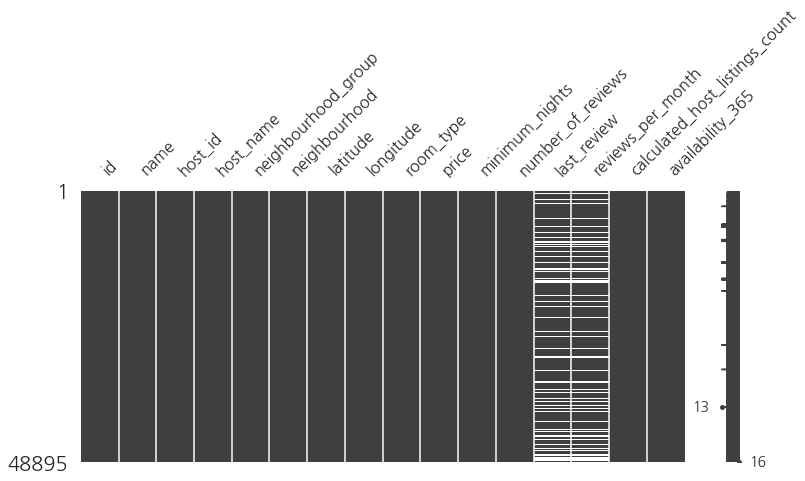

In [11]:
#matrix로 결측치 확인하기
missingno.matrix(bnb, figsize =(12,5))

<AxesSubplot:>

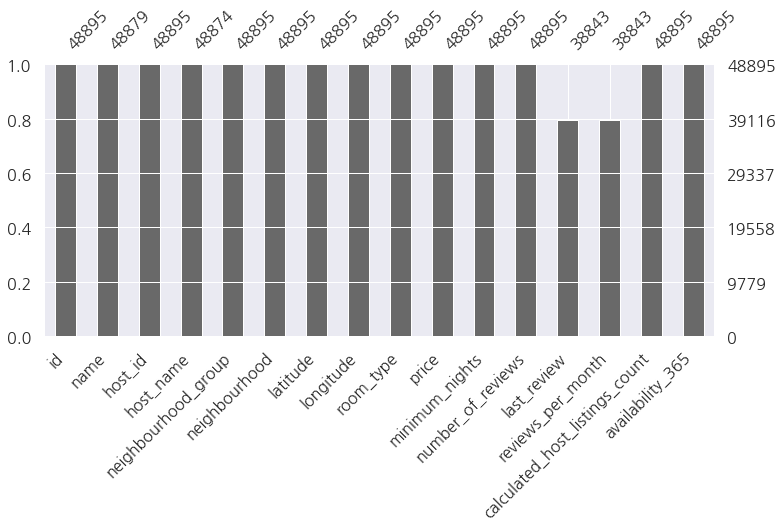

In [12]:
#bar chart로 결측치 확인하기
missingno.bar(bnb, figsize =(12,5))

In [13]:
#NaN 값 처리하기 
bnb.fillna({'reviews_per_month':0}, inplace=True) #월 평균 리뷰 개수(reviews_per_month)에는 0 처리
bnb.fillna({'name':"NoName"}, inplace=True) #이름이 공백인 경우는 NoName으로 처리

In [14]:
#사용하지 않을 컬럼은 삭제한다
#last review 컬럼은 대체할만한 컬럼이 있으므로 삭제해도 된다
bnb.drop(['id','last_review'], axis=1, inplace=True) 

In [15]:
#에어비앤비 이름과 호스트 이름이 같은 것 존재
bnb[bnb['name']==bnb['host_name']]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9473,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0.00,1,0
23996,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90
24607,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,0.05,18,180
26734,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,0.00,18,365
26752,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,0.05,18,365
26753,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,0.09,18,365
26889,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,0.00,18,365


In [16]:
#중복된 컬럼 확인
bnb.duplicated().sum()
#bnb.drop_duplicates(inplace=True) #중복된 컬럼이 존재한다면 삭제

0

In [17]:
bnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
#금액이 0인 에어비앤비가 11개 존재
len(bnb[bnb['price']==0])

11

In [19]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

## EDA & Visualization

### 간단한 분석

(-1000.0, 6000.0)

C:\Users\ASNKMGSK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASNKMGSK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


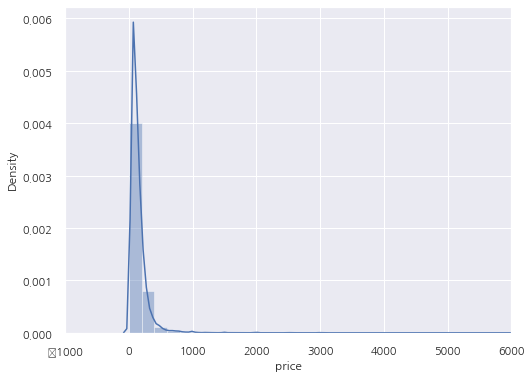

In [20]:
#뉴욕 Airbnb의 금액 분포 나타내기

f,ax = plt.subplots(1, 1, figsize=(8,6))
sns.distplot(bnb['price'],hist=True, ax=ax)

ax.set_xlim(-1000, 6000) #x축 범위 조정
#데이터가 한쪽으로 매우 쏠려있는 것 같다

In [21]:
#skewness and kurtosis 구하기
#Skewness(왜도): 데이터가 정규분포에서 한 쪽으로 치우쳐있는가?
#                -3 < skewness < 3 사이의 값이면 기준에 부합한다
#Kurtosis(첨도): 얼마나 뾰족한가(데이터가 얼마나 평균 근처에 몰려있는가)?
#               : 정규분포의 kurtosis = 0
print("Skewness: %.2f" % bnb['price'].skew())
print("Kurtosis: %.2f" % bnb['price'].kurt())
#skewness와 kurtosis 모두 매우 높게 나타난다
#kurtosis 값이 크다는 것 = 이상치가 많이 존재한다

Skewness: 19.12
Kurtosis: 585.67


In [22]:
#금액과 최소 숙박일수만 남겨놓는다
pd.concat([bnb['price'],bnb['minimum_nights']],axis=1)

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48890,70,2
48891,40,4
48892,115,10
48893,55,1


<AxesSubplot:xlabel='price', ylabel='minimum_nights'>

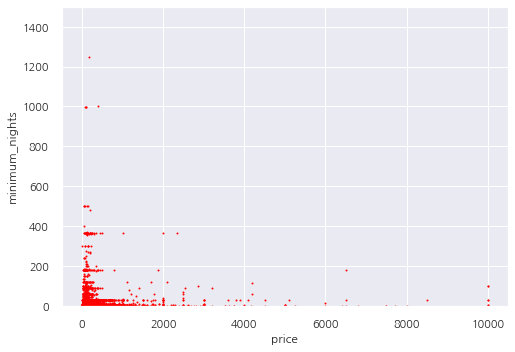

In [23]:
#가격(price)과 최소 숙박일수(minimum_nights) 간의 관계 확인

bnb.plot.scatter(x='price',y='minimum_nights',ylim=(0,1500), s=0.9, color='red')
#가격이 0인 데이터가 많이 존재한다
#이상치로 보이는 데이터도 많다

<AxesSubplot:xlabel='price'>

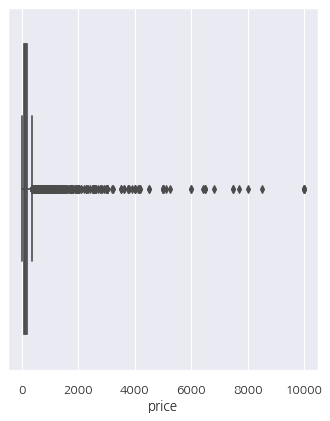

In [24]:
#금액 분포를 box plot으로 확인
f, ax = plt.subplots(1, 1, figsize=(5, 6), dpi = 80)

#box plot
sns.boxplot(bnb['price'], showfliers = True, ax=ax)
#outlier 값이 많이 존재함을 알수 있다

Text(0.5, 1.0, 'Correlation map for Airbnb Data')

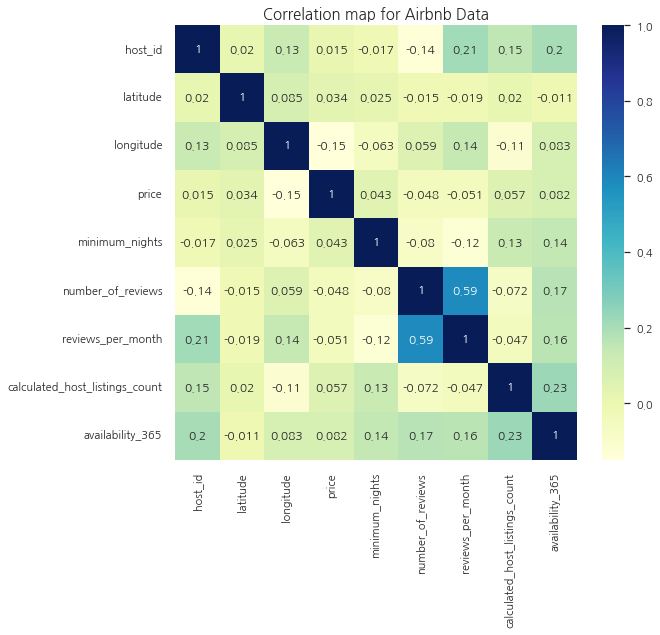

In [25]:
#컬럼 간 상관관계를 heatmap으로 확인
f, ax = plt.subplots(1, 1, figsize=(9, 8))

corrmat = bnb.corr()
sns.heatmap(corrmat, annot=True, cmap='YlGnBu', ax=ax)
plt.title('Correlation map for Airbnb Data', size=15)

#host_id와 월평균리뷰 수(reveiws_per_month), availability_365간에 상관 관계가 있다
#최소숙박일수(min_nights)와 no_of_listings_count 및 availability_365 사이에는 주목할만한 상관 관계가 있다
#가격은 availability_365 및 host_listings_count와의 상관 관계가 있다
#리뷰 수(number_of_reviews)와 월평균 리뷰 수(reviews_per_month)는 거의 동일한 정보값을 준다 >> 두 변수 중 하나로 분석
#리뷰 수(number_of_reviews)는 availability_365와 관련 있다

### 금액의 threshold를 정해서 outlier 제거하기

In [26]:
min_threshold,max_threshold= bnb['price'].quantile([0.01,0.99]) #백분위수로 0.01, 0.99에 있는 price 확인
min_threshold,max_threshold
#min_th

(30.0, 799.0)

In [27]:
bnb[bnb['price'] < min_threshold]
#bnb[bnb['price'] > max_threshold] 
#min 404개, max 474개
#min 404개, max 474개

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0.92,1,226
2675,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0.07,1,321
2860,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0.00,4,137
3020,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5.53,3,50
3918,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1.00,1,322
48647,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0.00,1,24
48832,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0.00,3,363
48867,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0.00,6,338


In [28]:
bnb_thr = bnb[(bnb['price'] > min_threshold) & (bnb['price'] < max_threshold)]
bnb_thr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47744 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            47744 non-null  object 
 1   host_id                         47744 non-null  int64  
 2   host_name                       47724 non-null  object 
 3   neighbourhood_group             47744 non-null  object 
 4   neighbourhood                   47744 non-null  object 
 5   latitude                        47744 non-null  float64
 6   longitude                       47744 non-null  float64
 7   room_type                       47744 non-null  object 
 8   price                           47744 non-null  int64  
 9   minimum_nights                  47744 non-null  int64  
 10  number_of_reviews               47744 non-null  int64  
 11  reviews_per_month               47744 non-null  float64
 12  calculated_host_listings_count  

<AxesSubplot:xlabel='price', ylabel='Density'>

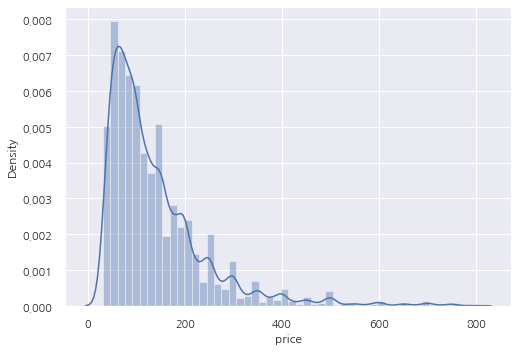

In [29]:
#sns.distplot으로 금액 분포가 어떻게 달라졌는지 확인해보자
sns.distplot(bnb_thr['price'])

In [30]:
#skewness and kurtosis
print("Skewness: %.2f" % bnb_thr['price'].skew())
print("Kurtosis: %.2f" % bnb_thr['price'].kurt())

Skewness: 2.24
Kurtosis: 7.04


<AxesSubplot:xlabel='price'>

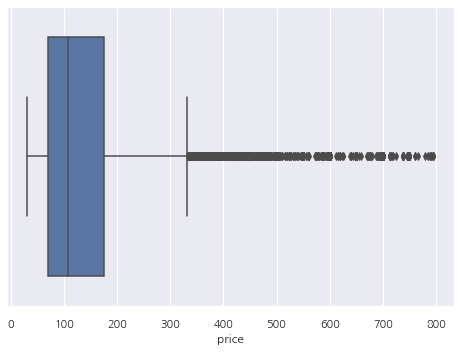

In [31]:
sns.boxplot(bnb_thr['price'])

### 가장 많이 리스트 된 호스트 

In [32]:
bnb_thr.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [33]:
#가장 많이 리스팅 된 호스트(이름 기준)는?
top_host= bnb_thr.host_name.value_counts().head(10)
top_host

Michael         410
David           395
Sonder (NYC)    327
John            288
Alex            272
Blueground      232
Sarah           225
Daniel          223
Jessica         200
Maria           198
Name: host_name, dtype: int64

In [34]:
top_host2 = pd.DataFrame(top_host)
top_host2.reset_index(inplace=True)
top_host2.rename(columns={'index': 'host_name', 'host_name':'count'}, inplace=True)
top_host2

,host_name,count
0,Michael,410
1,David,395
2,Sonder (NYC),327
3,John,288
4,Alex,272
5,Blueground,232
6,Sarah,225
7,Daniel,223
8,Jessica,200
9,Maria,198


[Text(0, 0, 'Michael'),
 Text(1, 0, 'David'),
 Text(2, 0, 'Sonder (NYC)'),
 Text(3, 0, 'John'),
 Text(4, 0, 'Alex'),
 Text(5, 0, 'Blueground'),
 Text(6, 0, 'Sarah'),
 Text(7, 0, 'Daniel'),
 Text(8, 0, 'Jessica'),
 Text(9, 0, 'Maria')]

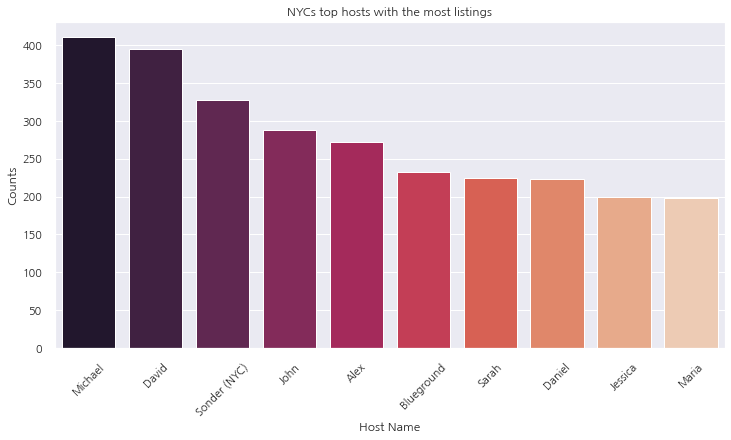

In [35]:
#bar 그래프로 나타내기
f, ax = plt.subplots(1, 1, figsize = (12,6))

sns.barplot(x='host_name', y= 'count', data=top_host2, palette='rocket', ax=ax)
ax.set_title('NYCs top hosts with the most listings')
ax.set_xlabel('Host Name')
ax.set_ylabel('Counts')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### 가장 비싼 방과 가장 저렴한 방은?

In [36]:
#지역별로 가장 비싼 방은?
#idxmax: 최대값을 가지는 index를 출력한다
bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()

neighbourhood_group
Bronx             8521
Brooklyn          4428
Manhattan         7017
Queens           14747
Staten Island     3049
Name: price, dtype: int64

In [37]:
#지역별로 가장 비싼 방은?
bnb_thr.loc[bnb_thr.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]

,name,neighbourhood_group,host_name,price
8521,1 Room in a 2 Bedroom Available,Bronx,Jonathan,680
4428,Unique Brooklyn Brownstone,Brooklyn,Rachel,795
7017,Historic Upper West Side Townhouse,Manhattan,David,795
14747,3 bedroom near Park,Queens,Jackie,750
3049,Spacious center hall colonial,Staten Island,Donna,700


In [38]:
#지역별로 가장 저렴한 방은?
#idxmax: 최대값을 가지는 index를 출력한다
bnb_thr.groupby(['neighbourhood_group'])['price'].idxmin()

neighbourhood_group
Bronx             3889
Brooklyn          2887
Manhattan         7431
Queens            6615
Staten Island    30312
Name: price, dtype: int64

In [39]:
#지역별로 가장 저렴한 방은?
bnb_thr.loc[bnb_thr.groupby(['neighbourhood_group'])['price'].idxmin()][['name','neighbourhood_group','host_name','price']]

,name,neighbourhood_group,host_name,price
3889,"A Simple, Calm Space",Bronx,Août,32
2887,Amazing Spacious Room,Brooklyn,Lord Daniel,31
7431,Cozy room right on BROADWAY - Washington Heights,Manhattan,Nga,31
6615,"Super Clean, Quiet & Spacious Room",Queens,Troy,31
30312,Nice room near SI Ferry \n15 minutes by car.,Staten Island,Sara I,31


### 지역별 금액 분포

In [40]:
#지역(neighbourhood_group)이 어떻게 나뉘어져 있는지 확인
bnb_thr['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Prices with different regions')

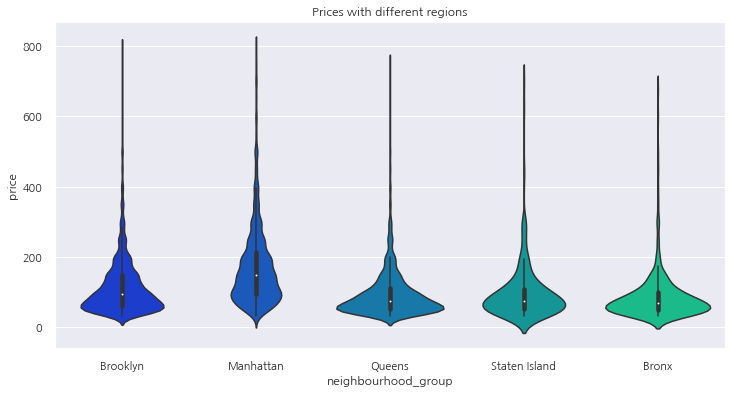

In [41]:
#Violin plot으로 지역 별 에어비앤비 금액 분포 확인
f, ax = plt.subplots(1, 1, figsize = (12,6))

sns.violinplot(x='neighbourhood_group',y='price', data=bnb_thr ,palette='winter', ax=ax)
ax.set_title('Prices with different regions')

#맨하탄이 대체적으로 가격이 높다
#대부분 100$ 이하에서 가격대가 형성되어 있다

### 지역별 방 타입

In [42]:
#방 타입(room_type) 종류는?
bnb_thr['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [64]:
#groupby로 집계한 다음 unstack 함수를 사용해서 깔끔하게 나타낸다
room_type2 = bnb_thr.groupby(['neighbourhood_group'])['room_type'].value_counts().unstack(0)
room_type2

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,377,9470,12887,2080,172
Private room,610,9909,7875,3285,177
Shared room,34,279,458,127,4


[Text(0, 0, 'Entire home/apt'),
 Text(1, 0, 'Private room'),
 Text(2, 0, 'Shared room')]

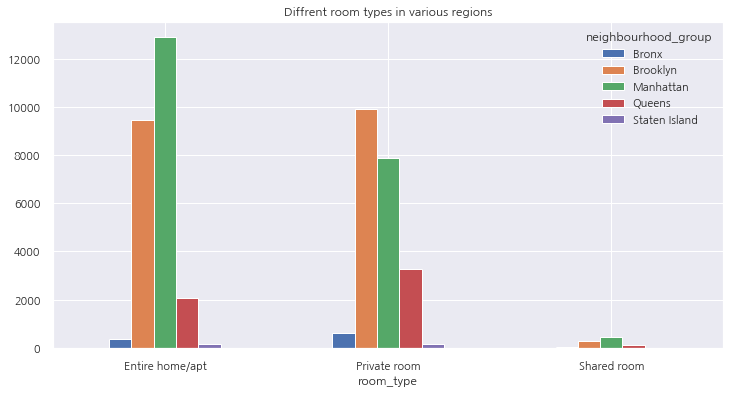

In [44]:
#지역별로 어떤 방 타입이 많은가?
g = room_type2.plot(kind='bar', figsize = (12,6))
g.set_title('Diffrent room types in various regions')
g.set_xticklabels(g.get_xticklabels(), rotation=0)

#맨하탄은 아파트/집 전체를 빌려주는 형태가 가장 많음
#독립적인 방 하나만 빌려주는 것은 브루클린이 가장 많음
#쉐어룸은 개수가 가장 적다

### 리뷰가 많은 방은?

In [45]:
#뉴욕에서 가장 리뷰가 많이 된 방
top10_review= bnb.nlargest(10,'reviews_per_month')
top10_review[['name','reviews_per_month','neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

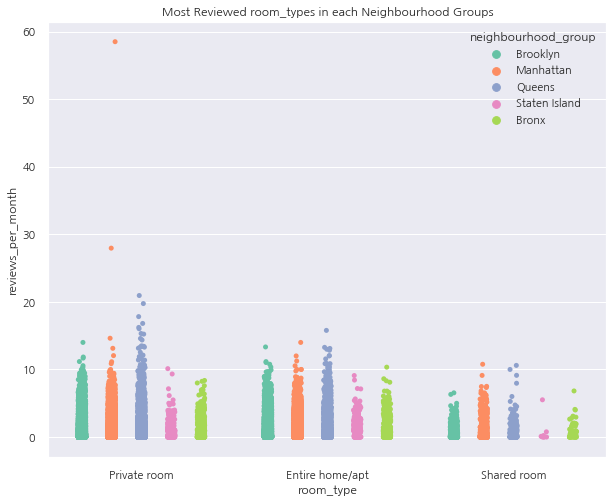

In [46]:
f, ax = plt.subplots(1, 1, figsize=(10,8))

sns.stripplot(x='room_type',y='reviews_per_month', data = bnb, hue='neighbourhood_group'
  , dodge=True, jitter = True, palette='Set2', ax=ax) 
#dodge = hue 별로 데이터를 나눠서 쌓아준다
#jitter = 가로축 위치에 변동을 줘서 데이터가 겹치지 않도록 해줌

ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

#개인실은 퀸즈가 가장 많은 리뷰를 많이 받았다
#맨하탄과 브루클린은 리뷰 수가 비슷하다

### 위도와 경도로 지도 위에 위치 나타내기

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

C:\Users\ASNKMGSK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASNKMGSK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


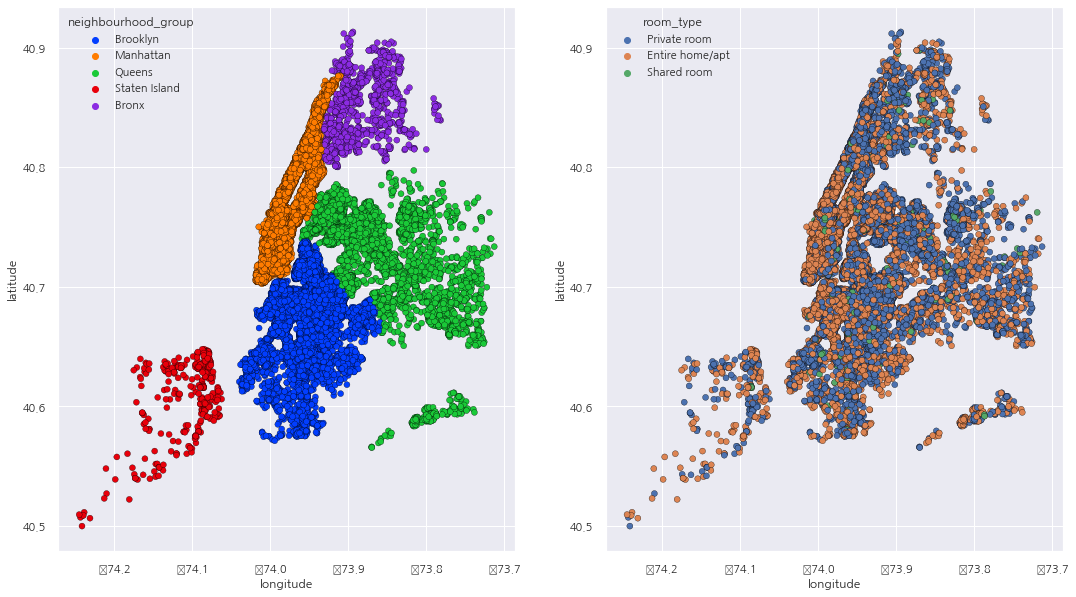

In [47]:
f, ax = plt.subplots(1, 2, figsize = (18, 10))

sns.scatterplot(x= 'longitude', y='latitude', data=bnb_thr, hue= 'neighbourhood_group',palette='bright', edgecolor='black',linewidth=0.3, ax=ax[0])
sns.scatterplot(x= 'longitude', y='latitude', data=bnb_thr, hue= 'room_type',edgecolor='black',linewidth=0.3, ax=ax[1])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

C:\Users\ASNKMGSK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASNKMGSK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


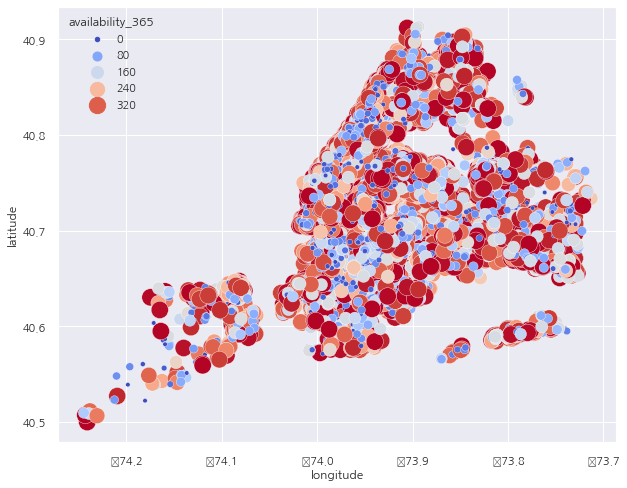

In [48]:
#원의 크기로 데이터 나타내기
f, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.scatterplot(data=bnb_thr, x='longitude', y='latitude', hue="availability_365", 
                palette='coolwarm', size='availability_365', sizes=(20,300))